In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [86]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [31]:
pd.options.display.max_columns = 500

In [87]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [64]:
df

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
T0005689465,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0005908509,11.72,1.0,2.74229,3.28500,0,61.0,47,76,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005908510,74.81,7.0,2.81059,0.44500,0,61.0,63,88,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005908512,40.17,10.0,2.99565,3.33625,0,61.0,48,75,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [88]:
catigorical_col = df.select_dtypes(exclude=['float64', 'int64']).columns
numeric_col = df.select_dtypes(exclude='object').columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131662 entries, T0005689460 to T0005908514
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  111452 non-null  object 
 2   Customer_Since_Months        125742 non-null  float64
 3   Life_Style_Index             111469 non-null  float64
 4   Confidence_Life_Style_Index  111469 non-null  object 
 5   Destination_Type             131662 non-null  object 
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         60632 non-null   float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  in

In [8]:
### Your code is here
df.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [89]:
for column in numeric_col:
    df[column] = df[column].fillna(df[column].median())

In [90]:
top_cat = df[catigorical_col].describe().iloc[2]

In [91]:
for i in range(len(catigorical_col)):
    df[catigorical_col[i]] = df[catigorical_col[i]].fillna(top_cat[i])

In [29]:
df.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [92]:
df = pd.get_dummies(data = df, columns=catigorical_col, drop_first=True)

In [93]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [94]:
corr = df.corr()

In [95]:
corr[corr==1] = 0
corr = corr.abs()

In [96]:
corr.max().max()

0.6834369134515615

### Training

In [97]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [98]:
X = df.drop('Surge_Pricing_Type', axis = 1)
y = df['Surge_Pricing_Type']

In [99]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [100]:
X_train

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
T0005865911,100.88,2.0,3.15274,3.54500,0,61.0,58,92,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005847145,36.35,6.0,2.79805,2.84375,0,61.0,49,65,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005865571,7.08,10.0,2.72208,3.09125,1,61.0,59,93,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
T0005808983,21.19,10.0,2.79599,1.62500,0,61.0,58,78,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005798241,45.71,1.0,2.79805,3.48000,1,34.0,56,76,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0005714419,61.68,2.0,2.84332,3.20375,0,60.0,48,64,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005783719,107.71,4.0,2.99722,3.23250,0,37.0,51,86,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
T0005861093,47.58,10.0,2.79805,3.66375,1,61.0,48,89,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

### Your code is here
model = LogisticRegression()
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', OneVsRestClassifier(estimator=model))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', OneVsRestClassifier(estimator=LogisticRegression()))])

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [110]:
param_grid = {'svc__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'svc__estimator__C': [0.001, 0.01, 0.1, 1]}

In [107]:
### Your code is here
from sklearn.model_selection import GridSearchCV


In [111]:
gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy')
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        OneVsRestClassifier(estimator=LogisticRegression()))]),
             param_grid={'svc__estimator__C': [0.001, 0.01, 0.1, 1],
                         'svc__estimator__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [113]:
gs.best_params_

{'svc__estimator__C': 0.001, 'svc__estimator__penalty': 'l2'}

In [112]:
print(classification_report(y_test, gs.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

In [115]:
### Your code is here
predict_proba = gs.predict_proba(X_test)


In [152]:
predict_proba

array([[0.3062245 , 0.27486411, 0.41891139],
       [0.02308103, 0.5404543 , 0.43646468],
       [0.02306905, 0.55678486, 0.42014609],
       ...,
       [0.48673502, 0.10505849, 0.4082065 ],
       [0.5666375 , 0.18013107, 0.25323143],
       [0.13873848, 0.59998973, 0.26127179]])

In [181]:
first_pob_pred = np.transpose([predict_proba[:,0]])
second_pob_pred = np.transpose([predict_proba[:,1]])
firht_pob_pred = np.transpose([predict_proba[:,2]])

In [182]:
pob_pred = [first_pob_pred, second_pob_pred, firht_pob_pred]
first_pob_pred

array([[0.3062245 ],
       [0.02308103],
       [0.02306905],
       ...,
       [0.48673502],
       [0.5666375 ],
       [0.13873848]])

In [118]:
from sklearn.calibration import CalibrationDisplay

In [150]:
first_pob_true = (y_test==1).astype('Int8')
second_pob_true = (y_test==2).astype('Int8')
firht_pob_true = (y_test==3).astype('Int8')

In [183]:
pob_true = [first_pob_true, second_pob_true, firht_pob_true]
first_pob_true

Trip_ID
T0005828439    0
T0005867265    0
T0005837398    0
T0005888871    0
T0005859728    1
              ..
T0005860557    1
T0005818708    0
T0005896460    1
T0005898831    0
T0005709930    0
Name: Surge_Pricing_Type, Length: 26333, dtype: Int8

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [227]:
### Создание полиномиальных признаков
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
X_polinomial = X.copy()
### Your code is here

In [228]:
def only_powers (X, degres = 4):
    powered_X = X.copy()
    for power in range(2,degres+1):
        powered_X = np.hstack((powered_X,np.power(X, power)))
    return powered_X

In [233]:
numeric_col = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3']
catigorical_col = ['Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Destination_Type_B', 'Destination_Type_C', 'Destination_Type_D',
       'Destination_Type_E', 'Destination_Type_F', 'Destination_Type_G',
       'Destination_Type_H', 'Destination_Type_I', 'Destination_Type_J',
       'Destination_Type_K', 'Destination_Type_L', 'Destination_Type_M',
       'Destination_Type_N', 'Gender_Male']

In [237]:
poly = FunctionTransformer(only_powers)
X_polinomial = np.hstack([X_polinomial[catigorical_col], 
                          poly.fit_transform(X_polinomial[numeric_col])])

In [243]:
len(X_polinomial[0])

52

In [244]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [245]:
### Your code is here
gs.fit(X_pol_train,y_train)
poly_pred = gs.predict(X_pol_test)

In [246]:
print(classification_report(y_test, poly_pred, digits=3))

              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.584     0.653      9612

    accuracy                          0.682     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.682     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

In [11]:
### Your code is here



**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [247]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [250]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

### Your code is here
ovo = OneVsOneClassifier(estimator=SGDClassifier())

In [254]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('one_vs_one', ovo)])

In [256]:
pipe2.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('one_vs_one', OneVsOneClassifier(estimator=SGDClassifier()))],
 'verbose': False,
 'scaler': StandardScaler(),
 'one_vs_one': OneVsOneClassifier(estimator=SGDClassifier()),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'one_vs_one__estimator__alpha': 0.0001,
 'one_vs_one__estimator__average': False,
 'one_vs_one__estimator__class_weight': None,
 'one_vs_one__estimator__early_stopping': False,
 'one_vs_one__estimator__epsilon': 0.1,
 'one_vs_one__estimator__eta0': 0.0,
 'one_vs_one__estimator__fit_intercept': True,
 'one_vs_one__estimator__l1_ratio': 0.15,
 'one_vs_one__estimator__learning_rate': 'optimal',
 'one_vs_one__estimator__loss': 'hinge',
 'one_vs_one__estimator__max_iter': 1000,
 'one_vs_one__estimator__n_iter_no_change': 5,
 'one_vs_one__estimator__n_jobs': None,
 'one_vs_one__estimator__penalty': 'l2',
 'one_vs_one__estimator__power_t': 0.5,
 'one_vs_one__estimator__random_state': N

Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [257]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [259]:
### Your code is here
gs = GridSearchCV(estimator=pipe2,
                  param_grid=param_grid,
                  scoring='accuracy')

In [260]:
gs.fit(X_train, y_train)
print(classification_report(y_test, gs.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.531     0.620      5372
           2      0.633     0.841     0.722     11349
           3      0.742     0.574     0.647      9612

    accuracy                          0.680     26333
   macro avg      0.707     0.648     0.663     26333
weighted avg      0.696     0.680     0.674     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?

In [261]:
from sklearn.manifold import TSNE

In [262]:
tsne = TSNE(n_components=2)
vizual = tsne.fit_transform(X_train)

In [264]:
X_tsne = np.concatenate((vizual, y_train.values.reshape(-1, 1)),
                       axis = 1)
X_tsne = pd.DataFrame(X_tsne, columns=['TSNE_1',
                                      'TSNE_2',
                                      'SEGMENT'])

<AxesSubplot:xlabel='TSNE_1', ylabel='TSNE_2'>

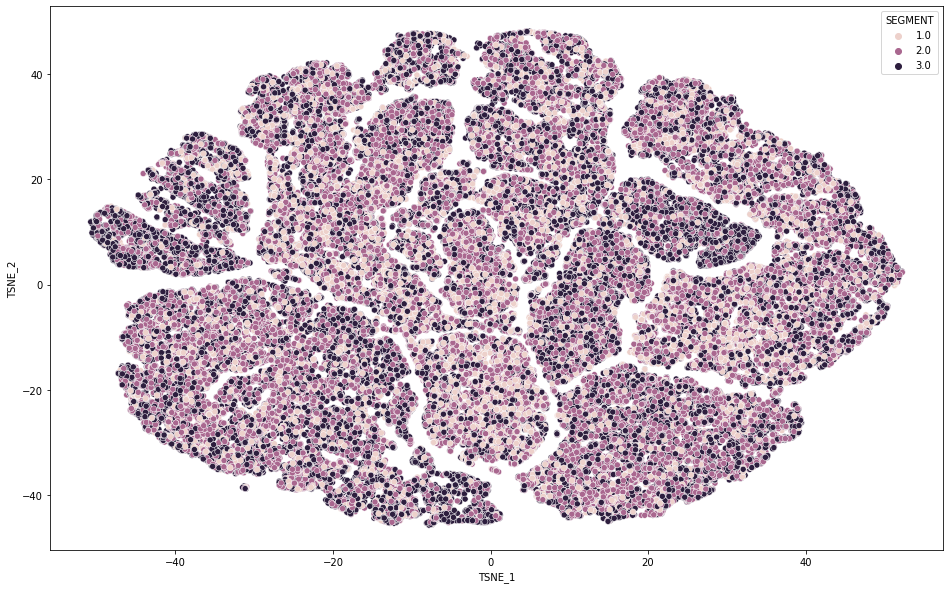

In [265]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16,10)
sns.scatterplot(data = X_tsne, x='TSNE_1',
               y = 'TSNE_2',
               hue = 'SEGMENT')

In [267]:
X_train.shape

(105329, 28)